In [21]:
import scipy.stats as sci
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

## Fatalities by Uniform Colors

In [2]:
#This data was collected from "real" deaths on the show from authoritative reference sources.
shirt_color = ["Blue", "Gold", "Red"]
areas = ["Science and medical", "Command and helm", "Operations, engineering, and security"]
crew = [136, 55, 239]
fatalities = [7, 9, 24]

In [3]:
#create the df for later chi square analysis
df = pd.DataFrame({'Shirt Color': shirt_color,
                   'Areas of the Ship': areas,
                   'Crew': crew,
                   'Fatalities': fatalities})
df.head()

,Areas of the Ship,Crew,Fatalities,Shirt Color
0,Science and medical,136,7,Blue
1,Command and helm,55,9,Gold
2,"Operations, engineering, and security",239,24,Red


## Totals for Chi Square Stats

In [4]:
#gather, manipulate, and group data for frequency calculations used in later chi square test
#Column Total Chi Square
crew_total = df['Crew'].sum()
fatalities_total = df['Fatalities'].sum()
alive_total = crew_total - fatalities_total
percent_fatalities = fatalities_total / crew_total
percent_alive = alive_total / crew_total
percent_total = percent_fatalities + percent_alive
expected_alive_all = alive_total
expected_dead_all = fatalities_total
expected_total_all = expected_alive_all + expected_dead_all
alive_all = [alive_total, percent_alive, expected_alive_all]
dead_all = [fatalities_total, percent_fatalities, expected_dead_all]
all_all = [crew_total, percent_total, expected_total_all]
all_df = pd.DataFrame({'Alive': alive_all,
                       'Dead': dead_all,
                       'Total': all_all},
                       index = ['Count', 'Percentage of Row', 'Expected Count']
                      )
all_df.head()

,Alive,Dead,Total
Count,390.000000,40.000000,430.0
Percentage of Row,0.906977,0.093023,1.0
Expected Count,390.000000,40.000000,430.0


## Blue Shirt Chi Square Stat

In [5]:
blue_dead = df.iloc[0]['Fatalities']
blue_alive = df.iloc[0]['Crew'] - blue_dead
blue_total = blue_alive + blue_dead
blue_percent_alive = blue_alive / blue_total * 100
blue_percent_dead = blue_dead / blue_total * 100
blue_percent_total = blue_total / blue_total * 100
blue_alive_expected = percent_alive *  blue_total
blue_dead_expected = percent_fatalities * blue_total
blue_total_expected = blue_alive_expected + blue_dead_expected
blue_alive_chi = ((blue_alive-blue_alive_expected)**2)/(blue_alive_expected)
blue_dead_chi = ((blue_dead-blue_dead_expected)**2)/(blue_dead_expected)
blue_all_chi = 0
blue_alive_list = [blue_alive, blue_percent_alive, blue_alive_expected, blue_alive_chi]
blue_dead_list = [blue_dead, blue_percent_dead, blue_dead_expected, blue_dead_chi]
blue_all_list = [blue_total, blue_percent_total, blue_total_expected, blue_all_chi]
blue_df = pd.DataFrame({'Alive': blue_alive_list,
                       'Dead': blue_dead_list,
                       'Total': blue_all_list},
                       index = ['Count', 'Percentage of Row', 'Expected Count', 'Contribution to Chi Square']
                      )
blue_df.loc['Count'] = blue_df.loc['Count'].map("{:,.0f}".format)
blue_df.loc['Percentage of Row'] = blue_df.loc['Percentage of Row'].map("{:,.2f}%".format)
blue_df.loc['Expected Count'] = blue_df.loc['Expected Count'].map("{:,.2f}".format)
blue_df.loc['Contribution to Chi Square'] = blue_df.loc['Contribution to Chi Square'].map("{:,.4f}".format)
blue_df

,Alive,Dead,Total
Count,129,7,136
Percentage of Row,94.85%,5.15%,100.00%
Expected Count,123.35,12.65,136.00
Contribution to Chi Square,0.2589,2.5243,0.0000


## Gold Shirt Chi Square Stat

In [6]:
gold_dead = df.iloc[1]['Fatalities']
gold_alive = df.iloc[1]['Crew'] - gold_dead
gold_total = gold_alive + gold_dead
gold_percent_alive = gold_alive / gold_total * 100
gold_percent_dead = gold_dead / gold_total * 100
gold_percent_total = gold_total / gold_total * 100
gold_alive_expected = percent_alive *  gold_total
gold_dead_expected = percent_fatalities * gold_total
gold_total_expected = gold_alive_expected + gold_dead_expected
gold_alive_chi = ((gold_alive-gold_alive_expected)**2)/(gold_alive_expected)
gold_dead_chi = ((gold_dead-gold_dead_expected)**2)/(gold_dead_expected)
gold_all_chi = 0
gold_alive_list = [gold_alive, gold_percent_alive, gold_alive_expected, gold_alive_chi]
gold_dead_list = [gold_dead, gold_percent_dead, gold_dead_expected, gold_dead_chi]
gold_all_list = [gold_total, gold_percent_total, gold_total_expected, gold_all_chi]
gold_df = pd.DataFrame({'Alive': gold_alive_list,
                       'Dead': gold_dead_list,
                       'Total': gold_all_list},
                       index = ['Count', 'Percentage of Row', 'Expected Count', 'Contribution to Chi Square']
                      )
gold_df.loc['Count'] = gold_df.loc['Count'].map("{:,.0f}".format)
gold_df.loc['Percentage of Row'] = gold_df.loc['Percentage of Row'].map("{:,.2f}%".format)
gold_df.loc['Expected Count'] = gold_df.loc['Expected Count'].map("{:,.2f}".format)
gold_df.loc['Contribution to Chi Square'] = gold_df.loc['Contribution to Chi Square'].map("{:,.4f}".format)
gold_df

,Alive,Dead,Total
Count,46,9,55
Percentage of Row,83.64%,16.36%,100.00%
Expected Count,49.88,5.12,55.00
Contribution to Chi Square,0.3024,2.9481,0.0000


## Red Shirt Chi Square Stat

In [7]:
red_dead = df.iloc[2]['Fatalities']
red_alive = df.iloc[2]['Crew'] - red_dead
red_total = red_alive + red_dead
red_percent_alive = red_alive / red_total * 100
red_percent_dead = red_dead / red_total * 100
red_percent_total = red_total / red_total * 100
red_alive_expected = percent_alive *  red_total
red_dead_expected = percent_fatalities * red_total
red_total_expected = red_alive_expected + red_dead_expected
red_alive_chi = ((red_alive-red_alive_expected)**2)/(red_alive_expected)
red_dead_chi = ((red_dead-red_dead_expected)**2)/(red_dead_expected)
red_all_chi = 0
red_alive_list = [red_alive, red_percent_alive, red_alive_expected, red_alive_chi]
red_dead_list = [red_dead, red_percent_dead, red_dead_expected, red_dead_chi]
red_all_list = [red_total, red_percent_total, red_total_expected, red_all_chi]
red_df = pd.DataFrame({'Alive': red_alive_list,
                       'Dead': red_dead_list,
                       'Total': red_all_list},
                       index = ['Count', 'Percentage of Row', 'Expected Count', 'Contribution to Chi Square']
                     )
red_df.loc['Count'] = red_df.loc['Count'].map("{:,.0f}".format)
red_df.loc['Percentage of Row'] = red_df.loc['Percentage of Row'].map("{:,.2f}%".format)
red_df.loc['Expected Count'] = red_df.loc['Expected Count'].map("{:,.2f}".format)
red_df.loc['Contribution to Chi Square'] = red_df.loc['Contribution to Chi Square'].map("{:,.4f}".format)
red_df

,Alive,Dead,Total
Count,215,24,239
Percentage of Row,89.96%,10.04%,100.00%
Expected Count,216.77,22.23,239.00
Contribution to Chi Square,0.0144,0.1405,0.0000


## Chi Square Test Statistic Results

In [8]:
chi_square = blue_alive_chi + blue_dead_chi + red_alive_chi + red_dead_chi + gold_alive_chi + gold_dead_chi
degrees_freedom = len(df) - 1
p_value = 0.045
chi_df = pd.DataFrame({'Chi-Square': chi_square,
                       'DF': degrees_freedom,
                       'P-Value': p_value},
                      index = ['Chi-Square Test Stats'])
chi_df['Chi-Square'] = chi_df['Chi-Square'].map("{:,.3f}".format)
chi_df

,Chi-Square,DF,P-Value
Chi-Square Test Stats,6.189,2,0.045


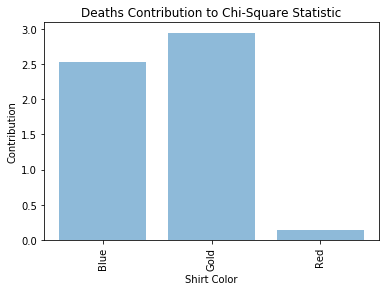

In [24]:
#graph contribution to chi square
x_axis = df['Shirt Color']
y_pos = np.arange(len(df))
contributions_dead = [blue_dead_chi, gold_dead_chi, red_dead_chi]

plt.bar(y_pos, contributions_dead, align='center', alpha=0.5)
plt.xticks(y_pos, x_axis, rotation='vertical')
plt.ylabel('Contribution')
plt.xlabel('Shirt Color')
plt.title('Deaths Contribution to Chi-Square Statistic')
filepath = os.path.join('images','charts', "Deaths_Contribution_to_Chi-Square.png")
plt.savefig(filepath, bbox_inches='tight')
plt.show()

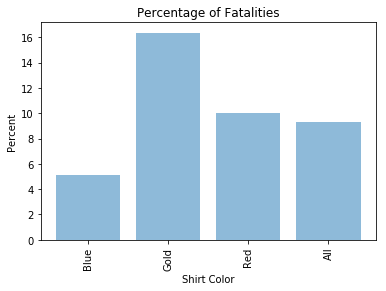

In [25]:
#Percentage of Fatalities
x_axis = ['Blue', 'Gold', 'Red', 'All']
y_pos = np.arange(len(df)+1)
percent_dead = [(blue_dead/blue_total*100), (gold_dead/gold_total*100), (red_dead/red_total*100), ((blue_dead+red_dead+gold_dead)/crew_total)*100]

plt.bar(y_pos, percent_dead, align='center', alpha=0.5)
plt.xticks(y_pos, x_axis, rotation='vertical')
plt.ylabel('Percent')
plt.xlabel('Shirt Color')
plt.title('Percentage of Fatalities')
filepath = os.path.join('images','charts', "Percentage_of_Fatalities.png")
plt.savefig(filepath, bbox_inches='tight')
plt.show()

## Two Proportions Test

In [27]:
#To compare security red-shirts to non-security red shirts
#Broken down data for red shirts
deaths = [18, 6]
personnel = [90, 149]
red_dept_df = pd.DataFrame({"Deaths": deaths,
                            "Personnel": personnel},
                           index = ['Red in Security', 'Red not in Security'])
red_dept_df

,Deaths,Personnel
Red in Security,18,90
Red not in Security,6,149


In [31]:
#Test and CI for Two Proportions
sample_p_security = red_dept_df.iloc[0]['Deaths']/red_dept_df.iloc[0]['Personnel']
sample_p_not_security = red_dept_df.iloc[1]['Deaths']/red_dept_df.iloc[1]['Personnel']
p_difference = sample_p_security - sample_p_not_security
z_score = 3.54
p_value = 0
two_proportions_df = pd.DataFrame({'Proportion Difference': p_difference,
                                   'Z Score': z_score,
                                   'P Value': p_value},
                                  index = ['Two Proportion Test'])
two_proportions_df

,P Value,Proportion Difference,Z Score
Two Proportion Test,0,0.159732,3.54


# P-Value is 0, two proportions significantly different. Just the red shirt security that have the highest fatality rate on the ship.